In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [6]:
stock = 'AAPL'
df = yf.download(stock, start='2018-01-01', end='2024-11-27')

[*********************100%***********************]  1 of 1 completed


In [7]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524342,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517284,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168934,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016010,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


In [8]:
df = df[['Adj Close']]

In [9]:
df.index.dtype

dtype('<M8[ns]')

In [10]:
df.index = pd.to_datetime(df.index)

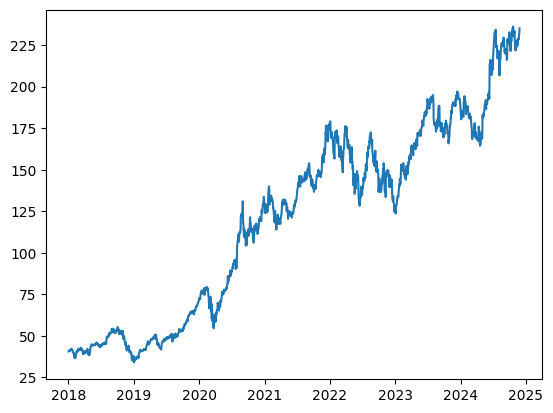

In [ ]:
plt.plot(df)
# not stationary as you can see because it moves quite a bit in a non-pattern 
# way

In [12]:
result = adfuller(df['Adj Close'])

In [13]:
result[0]

-0.2222570298559318

In [ ]:
result[1]
# over 0.5 so indicates not stationary

0.9358161144329236

In [16]:
np.var(df['Adj Close'])

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Ticker
AAPL    3358.670236
dtype: float64

In [17]:
print(np.var(df['Adj Close']))
print(np.std(df['Adj Close']))
print(np.mean(df['Adj Close']))

Ticker
AAPL    3358.670236
dtype: float64
Ticker
AAPL    57.954036
dtype: float64
120.73701527752453


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(array([437., 124.,  85.,  62., 201., 268., 247., 191.,  22., 101.]),
 array([ 33.95254898,  54.17930489,  74.40606079,  94.6328167 ,
        114.8595726 , 135.08632851, 155.31308441, 175.53984032,
        195.76659622, 215.99335213, 236.22010803]),
 <BarContainer object of 10 artists>)

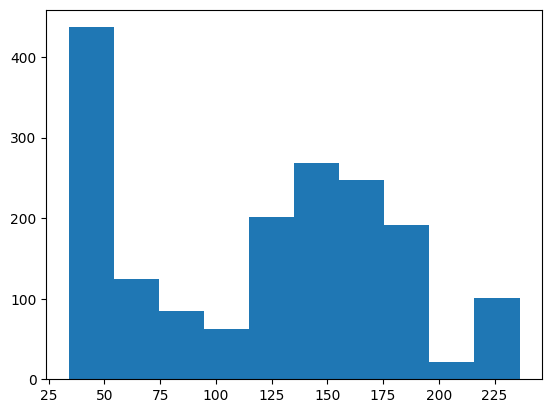

In [ ]:
plt.hist(df['Adj Close'])
# normal distribution indicates stationary; in this case the distribution is not normal

In [18]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


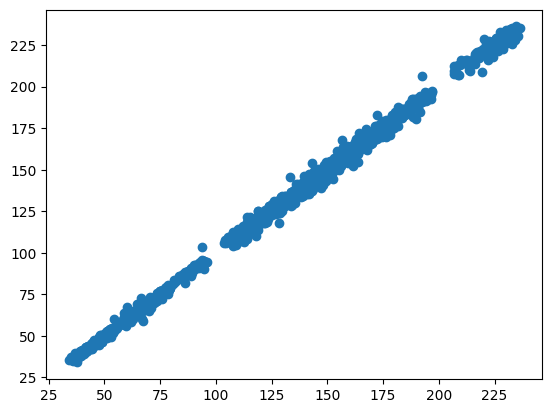

In [19]:
plt.scatter(df['price_diff'],df['Adj Close'])

In [21]:
df['t-2'] = df['Adj Close'].shift(2)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/531317907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-2'] = df['Adj Close'].shift(2)


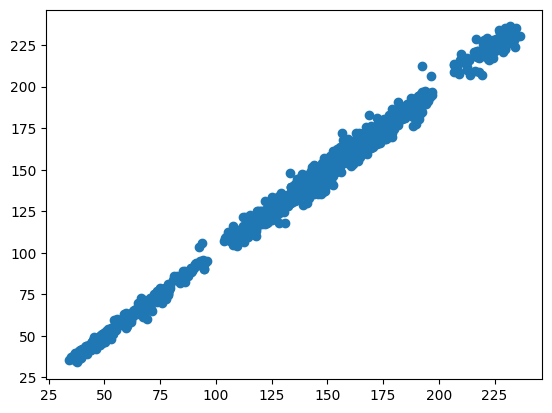

In [22]:
plt.scatter(df['t-2'], df['Adj Close'])

In [23]:
df['t-50'] = df['Adj Close'].shift(50)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/3545965860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-50'] = df['Adj Close'].shift(50)


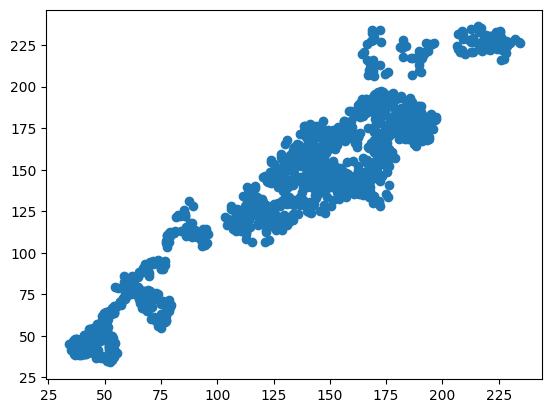

In [ ]:
# relationship over last 50 days
plt.scatter(df['t-50'], df['Adj Close'])
# not as strong which is indicated by points not being as closely compacted
# lag should not go that far back as the relationship is not as strong based on this visual

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

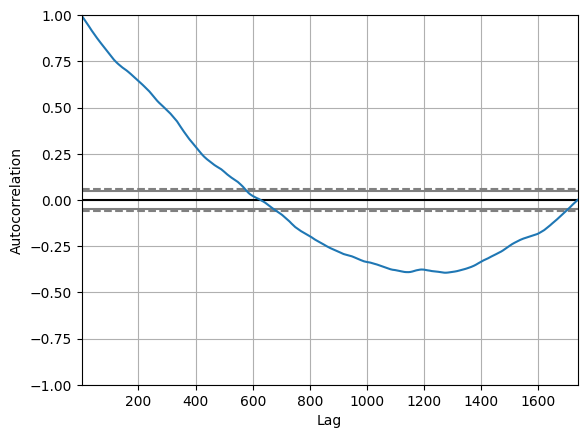

In [ ]:
# Correlation coefficient over course of lags
pd.plotting.autocorrelation_plot(df['Adj Close'])
# strong: 0.75+
# mid: 0.35-0.74
# weak: under 0.34

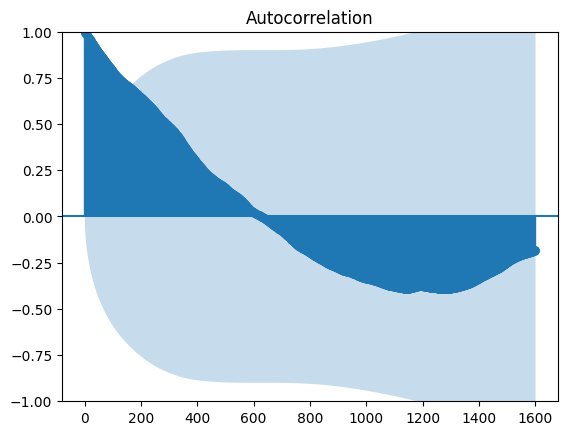

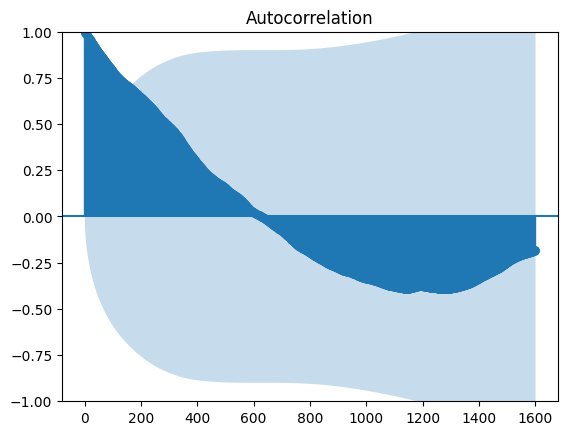

In [26]:
plot_acf(df['Adj Close'], lags=1600)

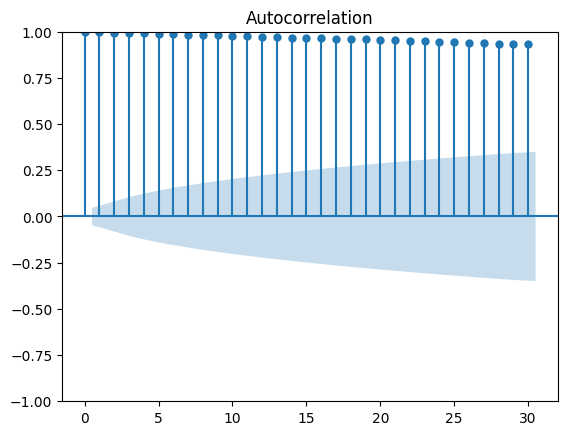

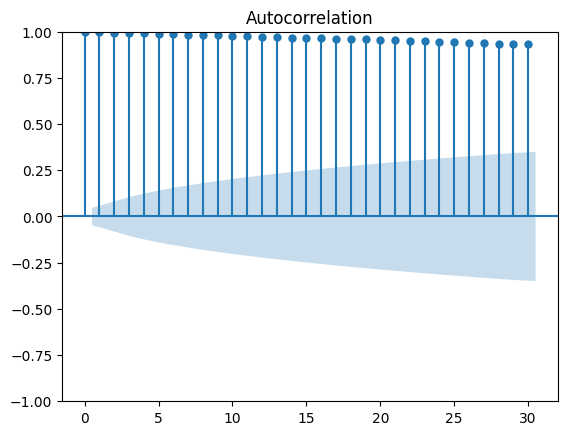

In [27]:
plot_acf(df['Adj Close'], lags=30)

In [28]:
# fit ARIMA model first
model = ARIMA(df['Adj Close'], order=(1,1,1))

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
fit = model.fit()

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1738
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3904.040
Date:                Wed, 27 Nov 2024   AIC                           7814.081
Time:                        20:42:15   BIC                           7830.460
Sample:                             0   HQIC                          7820.138
                               - 1738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5655      0.440      1.285      0.199      -0.297       1.428
ma.L1         -0.5883      0.434     -1.356      0.175      -1.439       0.262
sigma2         5.2450      0.108     48.549      0.0

In [31]:
# note that steps is how many days you want to forecast
forecast = fit.forecast(steps=30)

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
forecast

1738    234.956963
1739    234.898697
1740    234.865748
1741    234.847116
1742    234.836579
1743    234.830621
1744    234.827252
1745    234.825346
1746    234.824269
1747    234.823659
1748    234.823315
1749    234.823120
1750    234.823010
1751    234.822947
1752    234.822912
1753    234.822892
1754    234.822881
1755    234.822875
1756    234.822871
1757    234.822869
1758    234.822868
1759    234.822867
1760    234.822867
1761    234.822867
1762    234.822866
1763    234.822866
1764    234.822866
1765    234.822866
1766    234.822866
1767    234.822866
Name: predicted_mean, dtype: float64

In [ ]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_series = pd.Series(forecast, index=forecast_index)

In [37]:
forecast_df = pd.concat([pd.DataFrame(forecast_index), pd.DataFrame(forecast.reset_index())], axis=1)
forecast_df.drop('index', axis=1, inplace=True)
forecast_df.rename({0:'date'},axis=1, inplace=True)

In [38]:
forecast_df.set_index('date', inplace=True)
forecast_df

,predicted_mean
date,
2024-11-27,234.956963
2024-11-28,234.898697
2024-11-29,234.865748
2024-12-02,234.847116
2024-12-03,234.836579
2024-12-04,234.830621
2024-12-05,234.827252
2024-12-06,234.825346
2024-12-09,234.824269


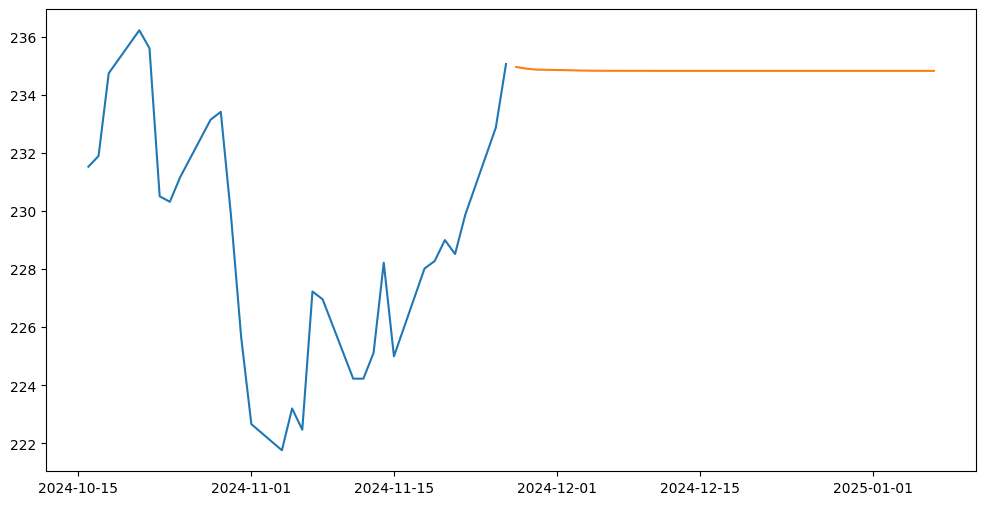

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].iloc[-30:])
plt.plot(forecast_df)

In [ ]:
# fit ARIMA model first
model = ARIMA(df['Adj Close']), orders=(50,1,1)

In [41]:
fit = model.fit()

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [42]:
# with each unit of change yesterday, we approximate that the model will increase by ___ cents (see coefficient for this)
# p value less than 0.05 because if greater than it is not statistically significant
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1738
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3904.040
Date:                Wed, 27 Nov 2024   AIC                           7814.081
Time:                        21:00:49   BIC                           7830.460
Sample:                             0   HQIC                          7820.138
                               - 1738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5655      0.440      1.285      0.199      -0.297       1.428
ma.L1         -0.5883      0.434     -1.356      0.175      -1.439       0.262
sigma2         5.2450      0.108     48.549      0.0

In [43]:
df.rename({'price_diff':'t-1'}, inplace=True)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/3700163085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'price_diff':'t-1'}, inplace=True)


In [ ]:
df.rename({'price_diff':'t-1'}, axis=1,inplace=True)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/1087581616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'price_diff':'t-1'}, axis=1,inplace=True)


In [45]:
df.drop('t-50', axis=1, inplace=True)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/1500505010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('t-50', axis=1, inplace=True)


In [46]:
df['t-3'] = df['Adj Close'].shift(3)

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_36573/253340229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-3'] = df['Adj Close'].shift(3)


In [47]:
#train test split
train_size = int(0.8 * len(df))

In [ ]:
# dates have to be sequential
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [49]:
# manual train, test split
X_train = train[['t-1', 't-2', 't-3']]
y_train = train['Adj Close']
X_test = test[['t-1', 't-2', 't-3']]
y_test = test['Adj Close']

In [50]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [51]:
y_pred = rf.predict(X_test)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

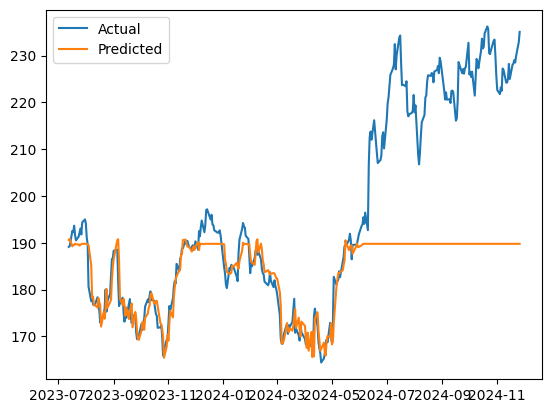

In [53]:
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.legend()

In [54]:
arima_forecast = fit.forecast(steps = len(y_test))

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [55]:
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))

In [56]:
arima_rmse

44.64115170477404

In [57]:
rmse

20.26805346235403